# Setting up Paths

In [1]:
#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
#path to compasrepo which contains ther popsynth folder
# pathRepo = '/Users/floorbroekgaarden/Programs/COMPAS/popsynth/Papers/BroekgaardenEtAl/black_hole-neutron_star/Scripts'



pathPostProcessing = '/Users/floorbroekgaarden/Projects/BHNS_project/Scripts'




# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import time
import sys
import copy
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append('/Users/floorbroekgaarden/Projects/BHNS_project/Scripts')
# sys.path.append(pathPostProcessing+'/2_CosmicIntegration')

# Custom Imports from COMPASrepo

In [3]:
import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
# import ClassEvents            as CE
# import ClassBayes             as CB
import coencodeVarious        as CV
from PostProcessingScripts import * 


# The cosmic integrator class

In [5]:
#Will only look at BBHs so might as well set everything
minz = 0.
maxz = 2.
resz = 1000
Data = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BBH',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=False, Cosmology='WMAP', COMPASbinaryFraction=0.6)

#I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
#Doesnt matter to much (between WMAP and 
#this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

print(Data.COMPAS.mass1)

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[21.2069  19.5982  14.5595  ...  6.97008  7.22899  7.43115]


In [8]:
Data_model1 = Data

In [ ]:
# #path to the data
# pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
# modelname = 'Fiducial'
# #Will only look at BBHs so might as well set everything
# minz = 0.
# maxz = 1.
# resz = 50
# Data_model1 = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BBH',\
#        minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=False, Cosmology='Custom Flat')

# #I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
# #Doesnt matter to much (between WMAP and 
# #this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

# print(Data_model1.COMPAS.mass1)
# print(len(Data_model1.COMPAS.mass1))

# The plot

In [5]:
# #The distribution of DCOs as a function of redshift

# method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF']
# SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)'          , 'Madau et al. (2014)']
# logNormal  = ['Neijssel Phenomenological', None                         , None                          , None]
# GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Panter et al. (2004) Single']
# MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)']

# linestyles = ['-'                        , '--'                         , ':'                           , '-.']
# labels     = ['Preferred model'          , 'Barrett et al. (2018) MSSFR', 'Furlong et al. (2015) Single', 'Ma et al. (2015)']


# cm       = plt.get_cmap('viridis')
# nColors  = 3+1  #want three colours for three variations (1 used in other plot later)
#                     # dont want the brigthest colour hence I add a dummy value.
#                     #Should be consistent with figure of metallicity PDFs
# mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

# colours  =  [ 'k'                        ,mycolors[0]                   , mycolors[1]                   , mycolors[2]]




# rates    = []
# totals   = []
# for nrL, L in enumerate(labels):
#     Data.MSSFR.Zprescription         = method[nrL]
#     Data.MSSFR.SFRprescription       = SFRs[nrL]
#     Data.MSSFR.logNormalPrescription = logNormal[nrL]
#     Data.MSSFR.GSMFprescription      = GSMFs[nrL]
#     Data.MSSFR.ZMprescription        = MZs[nrL]
#     Data.cosmologicalIntegration()
        
    
#     Row        =np.sum(Data.PerSystemPerRedshift_ratesObserved, axis=0)
#     rates.append(Row)
#     totals.extend([np.sum(Row)])
#     print(L, np.sum(Row))

('Preferred model', 895.1625058416562)
('Barrett et al. (2018) MSSFR', 5313.74474036679)
('Furlong et al. (2015) Single', 4641.210502253822)
('Ma et al. (2015)', 1699.406541536214)


In [ ]:
# ##### For each observation (column) we draw a chirpmass with probability gaussian

# events     = CE.Observations() 
# names, values, lowerErrors, upperErrors, survey =\
# events.giveParameterAndError(parameter='Mchirp', types=['BBH'])  


# draws = 5000
# arraydraws = np.zeros(shape=(draws, len(names)))


# Mtot       = Data.COMPAS.mChirp
# bins       = np.linspace(0,60,250)
# centerx     = (bins[1:]+bins[:-1])/2.
# dMtot      = np.diff(bins)
# gaussians  = []

# Bayes      = CB.BayesianLikelyhoodSingleObservation(datapoints = Data.COMPAS.mChirp)
# for nre, event in enumerate(names):
#     Bayes.setObservation(observation=values[nre], lowerError=lowerErrors[nre], \
#                          upperError=upperErrors[nre], confidence=0.9)
#     Bayes.calculatePDFposterior()
#     pdf, bins = np.histogram(Bayes._x, bins=bins, weights=Bayes._PDFobservation)
#     gaussians.append(pdf)
    
#     sigma   = Bayes._sigmaSymmetric
#     mu      = Bayes._symmetricMu
#     s = np.random.normal(mu, sigma, draws)
#     arraydraws[:,nre] = s

In [ ]:
# ###### Turn each PDF into CDF per model

# chirpMasses     = Data.COMPAS.mChirp
# indexSortMasses = np.argsort(chirpMasses)
# sortedMasses    = chirpMasses[indexSortMasses]
# CDFs            = []
# for nrM, model in enumerate(labels):
#     sortedRate  = rates[nrM][indexSortMasses]
#     CDFs.append(np.cumsum(sortedRate)/float(np.sum(sortedRate)))
# fig, axes = plt.subplots(1,1)
# for cdf in CDFs:
#     axes.plot(sortedMasses, cdf)
# plt.show()

In [ ]:
# def return10Masses(cdf, masses):
#     #draw number between 0-1
#     nrdraws = 10
#     d = np.random.uniform(low=0.0, high=1.0, size=nrdraws)
#     #find nearest value cdf
#     indices = np.zeros(nrdraws, dtype=int)
#     for nrd, draw in enumerate(d):
#         difference   = np.abs(cdf-draw)
#         minimum      = np.min(difference)
#         indices[nrd] = int(np.where(difference == minimum)[0][0])
#     indices = np.array(indices)
#     return np.sort(masses[indices])

# y10draws = np.cumsum(np.ones(10)/np.sum(np.ones(10)))
# x10draws = []
# counter  = 0
# while counter < draws:
#     masses = return10Masses(CDFs[0], sortedMasses)
#     x10draws.append(masses)
#     counter+=1
    
# print(len(x10draws))

In [ ]:
# fig        = plt.subplots(1,1,figsize=(9,14))
# ax0        = plt.subplot2grid((6,3),(0,0), colspan=3, rowspan=3)
# # ax1        = plt.subplot2grid((6,3),(3,0), colspan=3, rowspan=3)

# # ax12 = ax1.twinx() #right side bottom panel for cumulative

# ############
# #  Top panel with MSSFR
# ############
# Mtot       = Data.COMPAS.mChirp
# bins       = np.linspace(1,7.5,100)
# center     = (bins[1:]+bins[:-1])/2.
# dMtot      = np.diff(bins)

# for nrL, L in enumerate(labels):
#     rate       = rates[nrL]
#     rate, _    = np.histogram(Mtot, bins=bins, weights = rate)
#     rate       = np.divide(rate, dMtot)
#     rate       = rate / np.sum(rate)
#     label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#     ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
# # ax0.get_xaxis().set_visible(True)
# nameX = r'$\rm M_{chirp}\ \ [M_{\odot}] $'
# nameY = r'$\rm dP / dM_{chirp} \ [M_{\odot}^{-1}]  $'
# ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
# ax0.legend(loc=1, prop={'size':16})
# ax0.set_ylim(bottom=-0.002, top=0.071)


# ##########
# #
# #########


    
# # ax12.set_xlim(ax0.get_xlim())
# # ax1.set_xlim(ax0.get_xlim())
# # ax1.set_ylim(top=1.01)
# # y = ax1.get_yticks()
# # ax1.set_yticks(y[:-2])
# # ax12.set_ylim(top=0.8)
# # ax12.get_yaxis().set_visible(False)
# # nameX = r'$\rm M_{chirp}\ \ [M_{\odot}] $'
# # nameY = r'$\rm CDF $'
# # ax1 = CV.layoutAxes(ax1, nameX=nameX, nameY=nameY)
# # ax12 = CV.layoutAxes(ax12, nameX='', nameY='', second=True)
# plt.tight_layout()
# # plt.subplots_adjust(wspace=0., hspace=0.0)
# plt.savefig('./MassDistributionAtRedshiftObs.png', dpi=300, transparent=False)
# plt.show()
# # plt.close()

In [ ]:
# fig        = plt.subplots(1,1,figsize=(9,14))
# ax0        = plt.subplot2grid((6,3),(0,0), colspan=3, rowspan=3)
# # ax1        = plt.subplot2grid((6,3),(3,0), colspan=3, rowspan=3)

# # ax12 = ax1.twinx() #right side bottom panel for cumulative

# ############
# #  Top panel with MSSFR
# ############

# M1         = Data.COMPAS.mass1
# M2         = Data.COMPAS.mass2
# MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
# var_x = MBH 

# bins       = np.linspace(3,20,100)
# center     = (bins[1:]+bins[:-1])/2.
# dvar_x      = np.diff(bins)

# for nrL, L in enumerate(labels):
#     rate       = rates[nrL]
#     rate, _    = np.histogram(var_x, bins=bins, weights = rate)
#     rate       = np.divide(rate, dvar_x)
#     rate       = rate / np.sum(rate)
#     label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#     ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
# # ax0.get_xaxis().set_visible(True)
# nameX = r'$\rm Mass BH\ \ [M_{\odot}] $'
# nameY = r'$\rm dP / dM_{BH} \ [M_{\odot}^{-1}]  $'
# ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
# ax0.legend(loc=1, prop={'size':16})
# ax0.set_ylim(bottom=-0.002, top=0.071)


# ##########
# #
# #########


    
# # ax12.set_xlim(ax0.get_xlim())
# # ax1.set_xlim(ax0.get_xlim())
# # ax1.set_ylim(top=1.01)
# # y = ax1.get_yticks()
# # ax1.set_yticks(y[:-2])
# # ax12.set_ylim(top=0.8)
# # ax12.get_yaxis().set_visible(False)
# # nameX = r'$\rm M_{chirp}\ \ [M_{\odot}] $'
# # nameY = r'$\rm CDF $'
# # ax1 = CV.layoutAxes(ax1, nameX=nameX, nameY=nameY)
# # ax12 = CV.layoutAxes(ax12, nameX='', nameY='', second=True)
# plt.tight_layout()
# # plt.subplots_adjust(wspace=0., hspace=0.0)
# plt.savefig('./MassBHDistributionAtRedshiftObs.png', dpi=300, transparent=False)
# plt.show()
# # plt.close()

In [ ]:
# fig        = plt.subplots(1,1,figsize=(9,14))
# ax0        = plt.subplot2grid((6,3),(0,0), colspan=3, rowspan=3)
# # ax1        = plt.subplot2grid((6,3),(3,0), colspan=3, rowspan=3)

# # ax12 = ax1.twinx() #right side bottom panel for cumulative

# ############
# #  Top panel with MSSFR
# ############

# M1         = Data.COMPAS.mass1
# M2         = Data.COMPAS.mass2
# MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
# var_x = MNS 

# bins       = np.linspace(1,3,100)
# center     = (bins[1:]+bins[:-1])/2.
# dvar_x      = np.diff(bins)

# for nrL, L in enumerate(labels):
#     rate       = rates[nrL]
#     rate, _    = np.histogram(var_x, bins=bins, weights = rate)
#     rate       = np.divide(rate, dvar_x)
#     rate       = rate / np.sum(rate)
#     label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#     ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
# # ax0.get_xaxis().set_visible(True)
# nameX = r'$\rm Mass NS\ \ [M_{\odot}] $'
# nameY = r'$\rm dP / dM_{NS} \ [M_{\odot}^{-1}]  $'
# ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
# ax0.legend(loc=1, prop={'size':16})
# ax0.set_ylim(bottom=-0.002, top=0.091)


# ##########
# #
# #########


    
# # ax12.set_xlim(ax0.get_xlim())
# # ax1.set_xlim(ax0.get_xlim())
# # ax1.set_ylim(top=1.01)
# # y = ax1.get_yticks()
# # ax1.set_yticks(y[:-2])
# # ax12.set_ylim(top=0.8)
# # ax12.get_yaxis().set_visible(False)
# # nameX = r'$\rm M_{chirp}\ \ [M_{\odot}] $'
# # nameY = r'$\rm CDF $'
# # ax1 = CV.layoutAxes(ax1, nameX=nameX, nameY=nameY)
# # ax12 = CV.layoutAxes(ax12, nameX='', nameY='', second=True)
# plt.tight_layout()
# # plt.subplots_adjust(wspace=0., hspace=0.0)
# plt.savefig('./MassNSDistributionAtRedshiftObs.png', dpi=300, transparent=False)
# plt.show()
# # plt.close()

# 1. mass ratio distribution 

In [6]:
# #The distribution of DCOs as a function of redshift

# method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF']
# SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)'          , 'Madau et al. (2014)']
# logNormal  = ['Neijssel Phenomenological', None                         , None                          , None]
# GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Panter et al. (2004) Single']
# MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)']

# linestyles = ['-'                        , '--'                         , ':'                           , '-.']
# labels     = ['Preferred model'          , 'Barrett et al. (2018) MSSFR', 'Furlong et al. (2015) Single', 'Ma et al. (2015)']


# cm       = plt.get_cmap('viridis')
# nColors  = 3+1  #want three colours for three variations (1 used in other plot later)
#                     # dont want the brigthest colour hence I add a dummy value.
#                     #Should be consistent with figure of metallicity PDFs
# mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

# colours  =  [ 'k'                        ,mycolors[0]                   , mycolors[1]                   , mycolors[2]]




In [6]:
# #path to the data
# pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
# modelname = 'Fiducial'
# #Will only look at BBHs so might as well set everything
# minz = 0.
# maxz = 1.
# resz = 50
# Data_model1 = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BBH',\
#        minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=False, Cosmology='Custom Flat')

# #I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
# #Doesnt matter to much (between WMAP and 
# #this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

# print(Data_model1.COMPAS.mass1)
# print(len(Data_model1.COMPAS.mass1))

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[2.06203 9.0769  2.98903 ... 4.78319 4.4085  4.66631]
1366530


In [9]:
#     def printSFRoptions(self):

#         print("""
#         Default instance:
#         self.SFRprescription       = None 

#         Current Options  = Madau et al. (2014)
#                            Madau et al. (2017)
#                            Strolger et al. (2004)
#                            Neijssel et al. (2019)

#         """)

#     def printZMoptions(self):


#         print("""
#         If you use MZ and GSMF relations
#         i.e. self.Zprescription    = 'MZ_GSMF'

#         Default instance
#         self.ZMprescription        = None
#         Current Options = Ma et al. (2015),
#                       Langer et al. (2006)
#                       Langer et al. +offset (2006)
#         """)



#     def printGSMFoptions(self):


#         print("""
#         If you use MZ and GSMF relations
#         i.e. self.Zprescription    = 'MZ_GSMF'

#         Default instance
#         self.GSMFprescription      = None
#         Current Options = Panter et al. (2004) Single, 
#                           Furlong et al. (2015) Single,
#                           Furlong et al. (2015) Double
#         """







# rates_model1    = []
# totals_model1   = []
# for nrL, L in enumerate(labels):
#     Data_model1.MSSFR.Zprescription         = method[nrL]
#     Data_model1.MSSFR.SFRprescription       = SFRs[nrL]
#     Data_model1.MSSFR.logNormalPrescription = logNormal[nrL]
#     Data_model1.MSSFR.GSMFprescription      = GSMFs[nrL]
#     Data_model1.MSSFR.ZMprescription        = MZs[nrL]
#     Data_model1.cosmologicalIntegration()
#     weightSTROOPWAFEL = Data_model1.COMPAS.weight # //floor weight
#     Row        =  np.sum(Data_model1.PerSystemPerRedshift_ratesObserved*weightSTROOPWAFEL, axis=0) # //floor weight
# #     Row        =np.sum(Data_model1.PerSystemPerRedshift_ratesObserved, axis=0)
#     rates_model1.append(Row)
#     totals_model1.extend([np.sum(Row)])
#     print(L, np.sum(Row))

('Preferred model', 6.428338137313037)
('Barrett et al. (2018) MSSFR', 36.52149582603046)
('Furlong et al. (2015) Single', 34.073040697690224)
('Ma et al. (2015)', 11.186948828345791)


# CALCULATE ALL IMPORTANT MSSFR COMBINATIONS: 

In [9]:
rates_model1    = []
totals_model1   = []


method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF']
SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)'          , 'Madau et al. (2014)']
logNormal  = ['Neijssel Phenomenological', None                         , None                          , None]
GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Panter et al. (2004) Single']
MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)']

linestyles = ['-'                        , '--'                         , ':'                           , '-.']
labels     = ['Preferred model'          , 'Barrett et al. (2018) MSSFR', 'Furlong et al. (2015) Single', 'Ma et al. (2015)']



rates_model1    = []
totals_model1   = []
labelslist = []

GSMFs = ['Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Furlong et al. (2015) Double']
MZs   = [ 'Langer et al. (2006)'      , 'Langer et al. +offset (2006)', 'Ma et al. (2015)']
SFRs  = ['Madau et al. (2014)'         ,'Strolger et al. (2004)',     'Madau et al. (2017)']


# Neijssel:
         
Data_model1.MSSFR.Zprescription         = 'logNormal' 
Data_model1.MSSFR.SFRprescription       = 'Neijssel et al. (2019)'
Data_model1.MSSFR.logNormalPrescription = 'Neijssel Phenomenological'
Data_model1.MSSFR.GSMFprescription      = None
Data_model1.MSSFR.ZMprescription        = None
Data_model1.cosmologicalIntegration()
weightSTROOPWAFEL = Data_model1.COMPAS.weight # //floor weight
Row        =  np.sum(Data_model1.PerSystemPerRedshift_ratesObserved*weightSTROOPWAFEL, axis=0) # //floor weight
#     Row        =np.sum(Data_model1.PerSystemPerRedshift_ratesObserved, axis=0)
rates_model1.append(Row)
totals_model1.extend([np.sum(Row)])
labelslist.append('Neijssel 2019')
for ind_GSMF, GSMF in enumerate(GSMFs):
         for ind_MZ, MZ in enumerate(MZs):
             for ind_SFR, SFR in enumerate(SFRs):
                 
                Data_model1.MSSFR.Zprescription         = 'MZ_GSMF'
                Data_model1.MSSFR.SFRprescription       = SFR
#                 Data_model1.MSSFR.logNormalPrescription = logNormal[nrL]
                Data_model1.MSSFR.GSMFprescription      = GSMF
                Data_model1.MSSFR.ZMprescription        = MZ
                Data_model1.cosmologicalIntegration()
                weightSTROOPWAFEL = Data_model1.COMPAS.weight # //floor weight
                Row        =  np.sum(Data_model1.PerSystemPerRedshift_ratesObserved*weightSTROOPWAFEL, axis=0) # //floor weight
            #     Row        =np.sum(Data_model1.PerSystemPerRedshift_ratesObserved, axis=0)
                rates_model1.append(Row)
                totals_model1.extend([np.sum(Row)])
         
                labelslist.append(SFR + r'$\_+\_' + GSMF + r'$\_+\_' + MZ )
                
         

[21.2069  19.5982   4.00741 ...  2.68578  2.72037  2.98001]
['Neijssel 2019', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Madau et al. (2014)$\\_+\\_Furlong et al. (2015) Single$\\_+\\_Langer et al. (2006)', 'Strolger et al. (2004)$\\_+\\_Furlong e

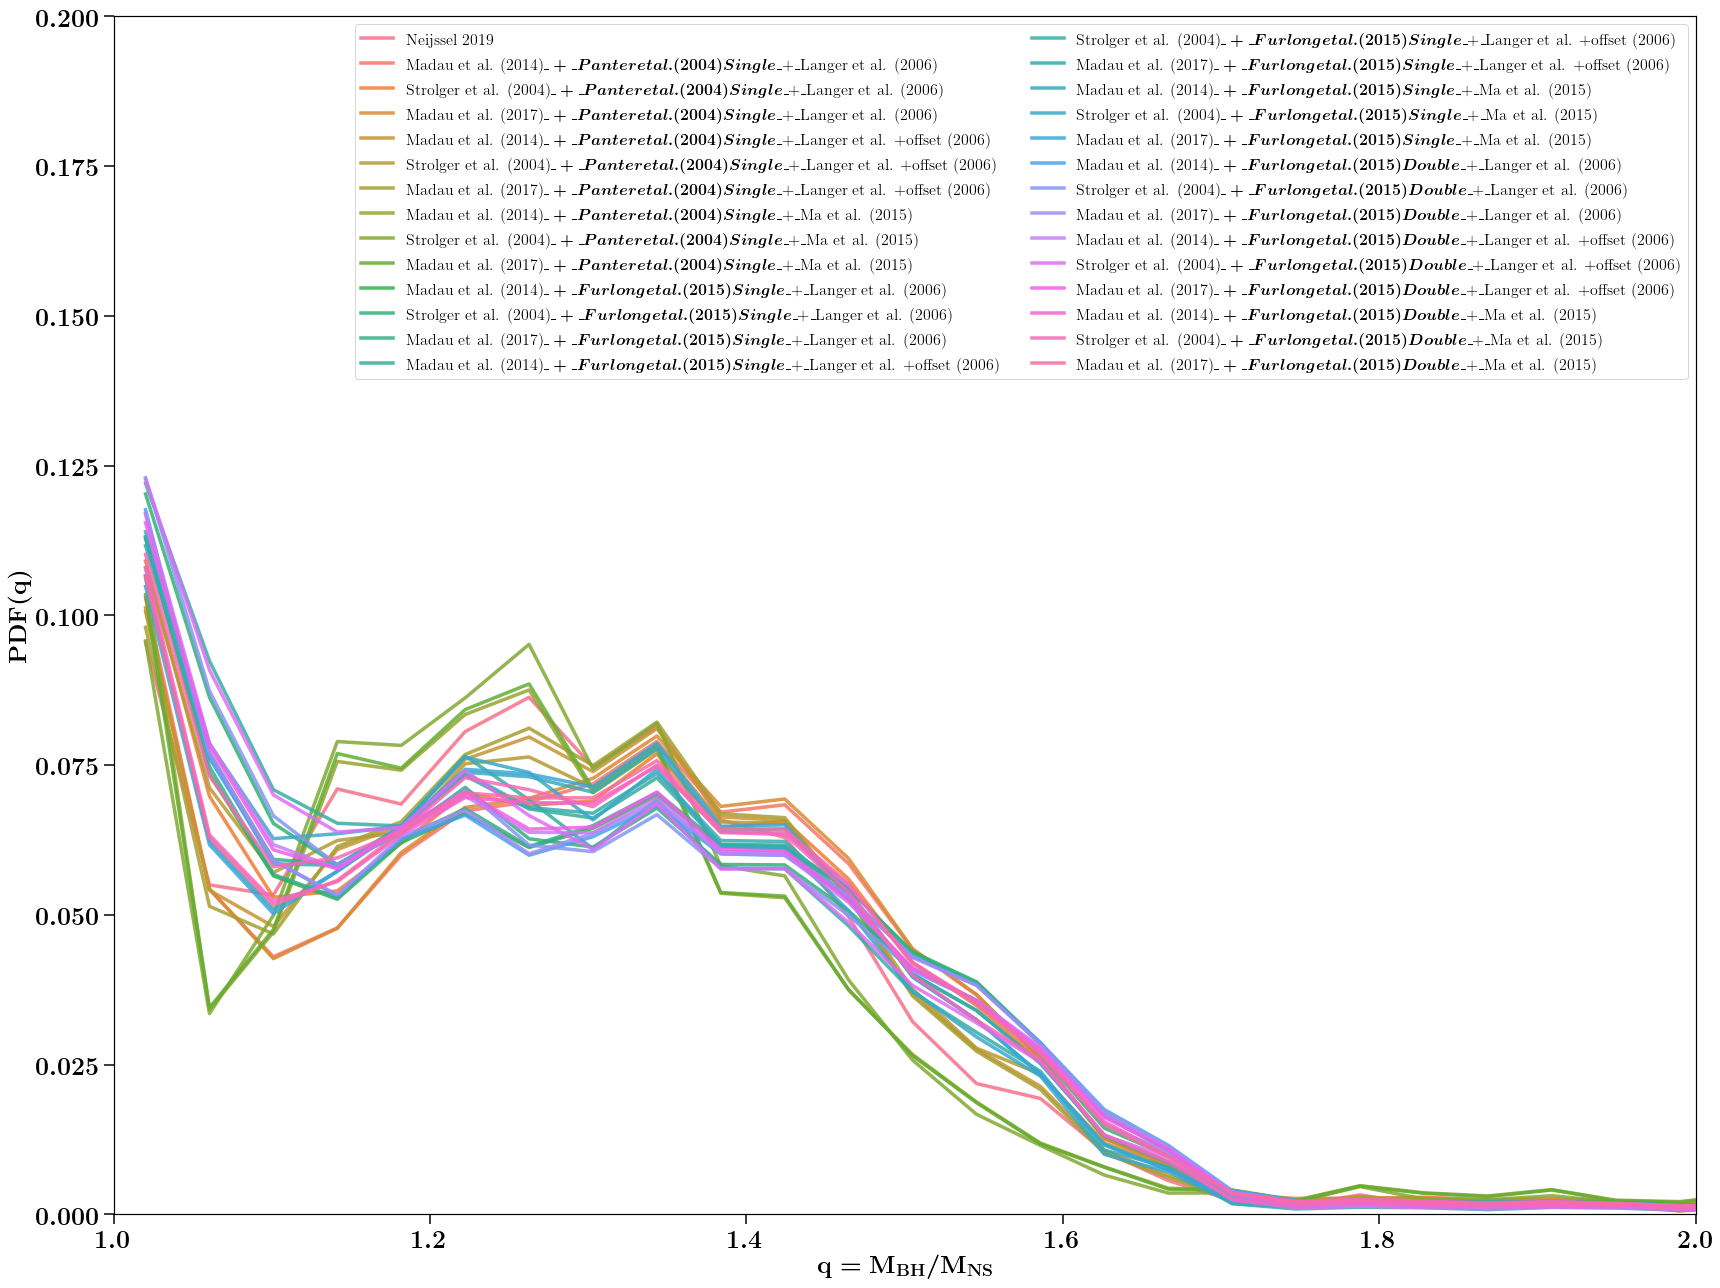

In [33]:


def plot_q_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(24,18))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]


        M1         = Data.COMPAS.mass1
        M2         = Data.COMPAS.mass2
        MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
        var_x = MBH / MNS
        weights = Data.COMPAS.weight

        print MNS

        bins       = np.linspace(1,5,100)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)
        print(labelslist)
        for nrL, L in enumerate(labelslist):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = L
            else:
                label =L
            ax0.plot(center, rate, lw=3.5, c=modelcolors[nrL], label=label, linestyle=linestyles[0], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm q = M_{BH} / M_{NS} $'
    nameY = r'$\rm PDF(q)   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16}, ncol=2)
    topp = 0.2
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=1, right=2)

    ## FILL PLOT WHERE BH-NS produces EM counterpart
    xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
    yy_disrupt_0spin = [0, topp]   
    xx_BHspin_0_5 = [0,7.1] 
    labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
    labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'

#     Mejected = ax0.fill_between(x=xx,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.6)
#     ax0.plot([3.5,3.5], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )



#     Mejected2 = ax0.fill_between(x=xx_BHspin_0_5,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.3)
#     ax0.plot([7.1,7.1], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )


#     leg2 = Legend(ax0, [Mejected, Mejected2], [labelqlegend, labelqlegend2], fontsize=fs-8, loc="center right", ncol=2)
#     ax0.add_artist(leg2)

    plt.tight_layout()
#     plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./qDistributionAtRedshiftObs'+ '_varMSSFR'  + '_BBH_.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", len(labelslist)) 

Datalist = [Data_model1] #, Data_model2, Data_model3]
modelnameslist = [r'Fiducial'] #, r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1] #, rates_model2, rates_model3]
totalslist = [totals_model1]#, totals_model2, totals_model3]

plot_q_distributions(modelnameslist, rateslist, totalslist, Datalist)

[21.2069  19.5982   4.00741 ...  2.68578  2.72037  2.98001]
['Neijssel 2019', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Madau et al. (2014)$\\_+\\_Furlong et al. (2015) Single$\\_+\\_Langer et al. (2006)', 'Strolger et al. (2004)$\\_+\\_Furlong e

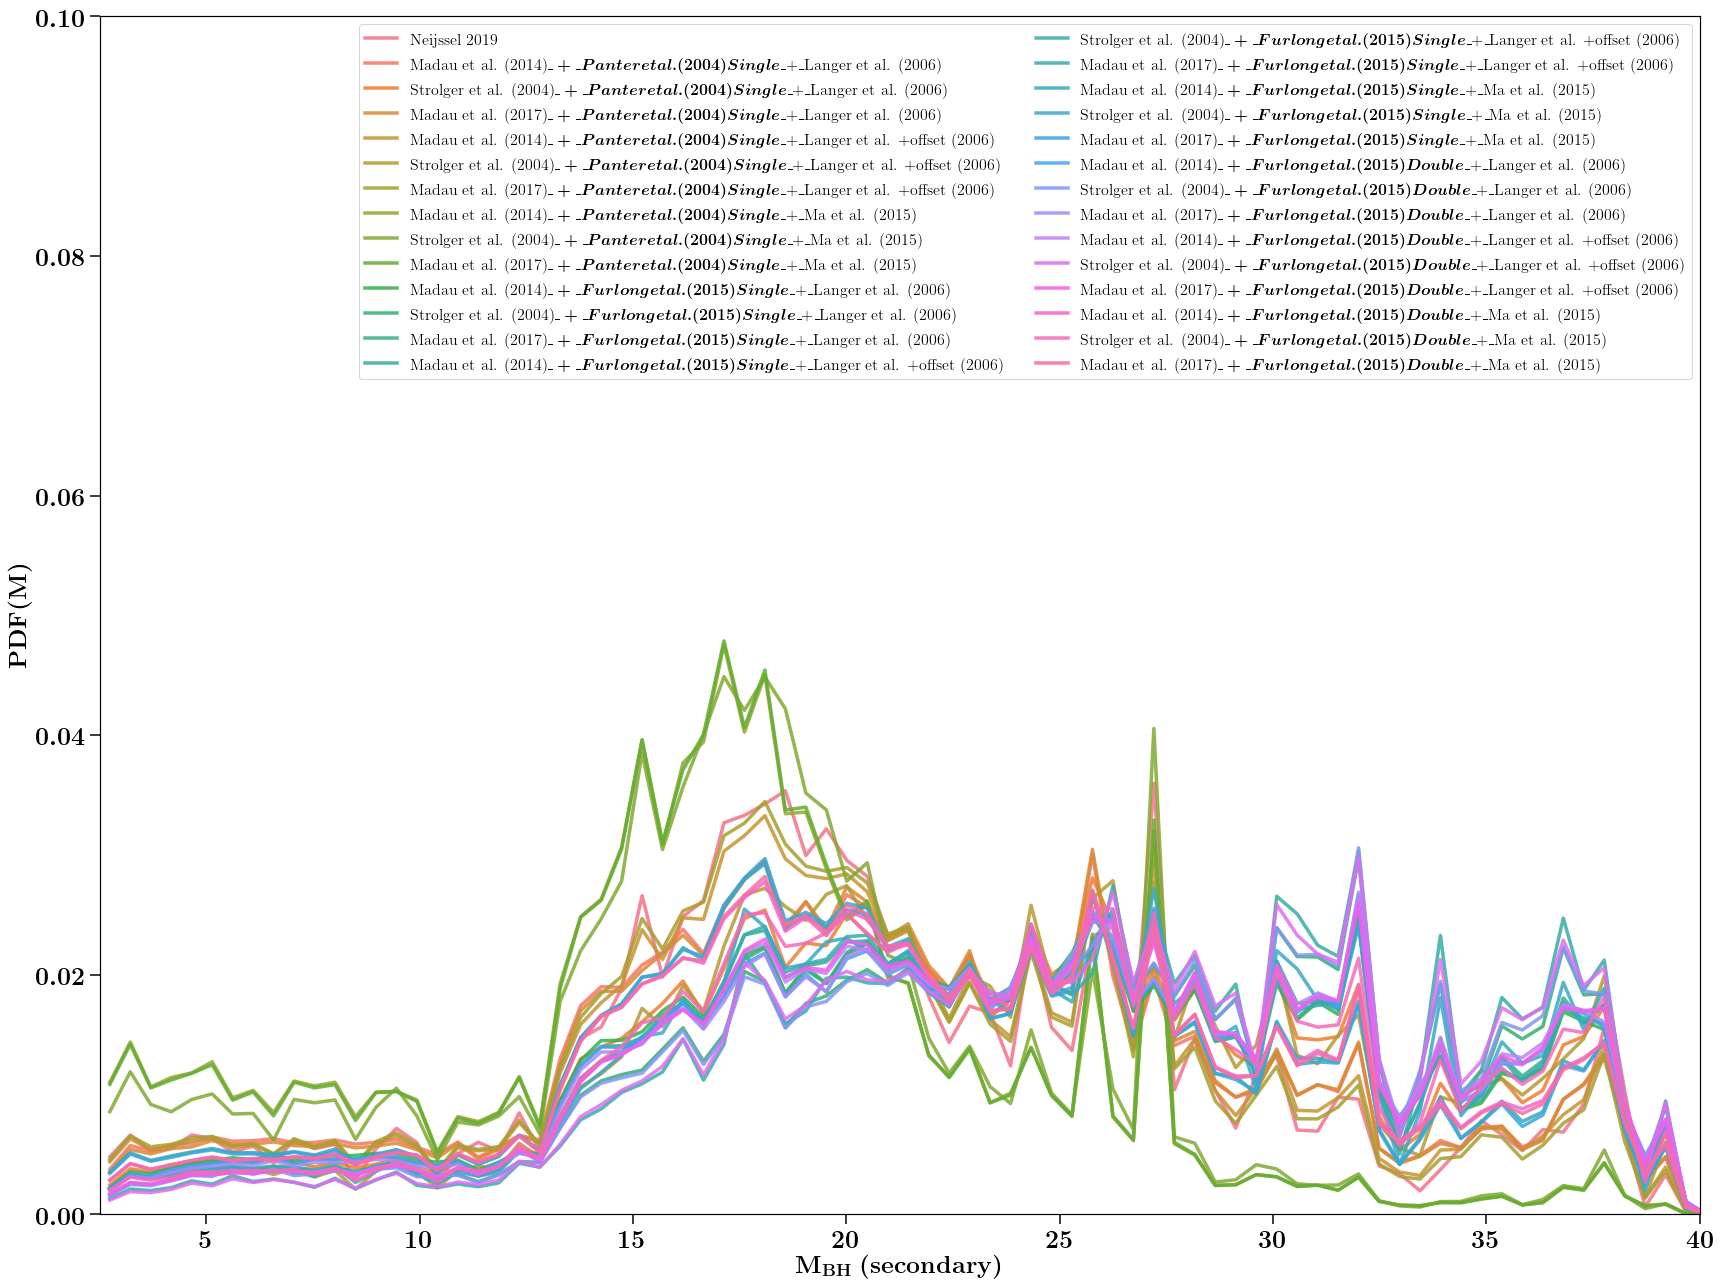

In [19]:


def plot_mns_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(24,18))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]


        M1         = Data.COMPAS.mass1
        M2         = Data.COMPAS.mass2
        MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
        var_x = MNS
        weights = Data.COMPAS.weight

        print MNS

        bins       = np.linspace(2.5,50,100)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)
        print(labelslist)
        for nrL, L in enumerate(labelslist):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = L
            else:
                label =L
            ax0.plot(center, rate, lw=3.5, c=modelcolors[nrL], label=label, linestyle=linestyles[0], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm  M_{BH} \  (secondary) $'
    nameY = r'$\rm PDF(M)   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16}, ncol=2)
    topp = 0.1
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=2.5, right=40)

#     ## FILL PLOT WHERE BH-NS produces EM counterpart
#     xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
#     yy_disrupt_0spin = [0, topp]   
#     xx_BHspin_0_5 = [0,7.1] 
#     labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
#     labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'


    plt.tight_layout()
#     plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./MnsDistributionAtRedshiftObs'+ '_varMSSFR'  + '_BBH_.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", len(labelslist)) 

Datalist = [Data_model1] #, Data_model2, Data_model3]
modelnameslist = [r'Fiducial'] #, r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1] #, rates_model2, rates_model3]
totalslist = [totals_model1]#, totals_model2, totals_model3]

plot_mns_distributions(modelnameslist, rateslist, totalslist, Datalist)

[21.2069  19.5982   4.00741 ...  2.68578  2.72037  2.98001]
['Neijssel 2019', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Madau et al. (2014)$\\_+\\_Furlong et al. (2015) Single$\\_+\\_Langer et al. (2006)', 'Strolger et al. (2004)$\\_+\\_Furlong e

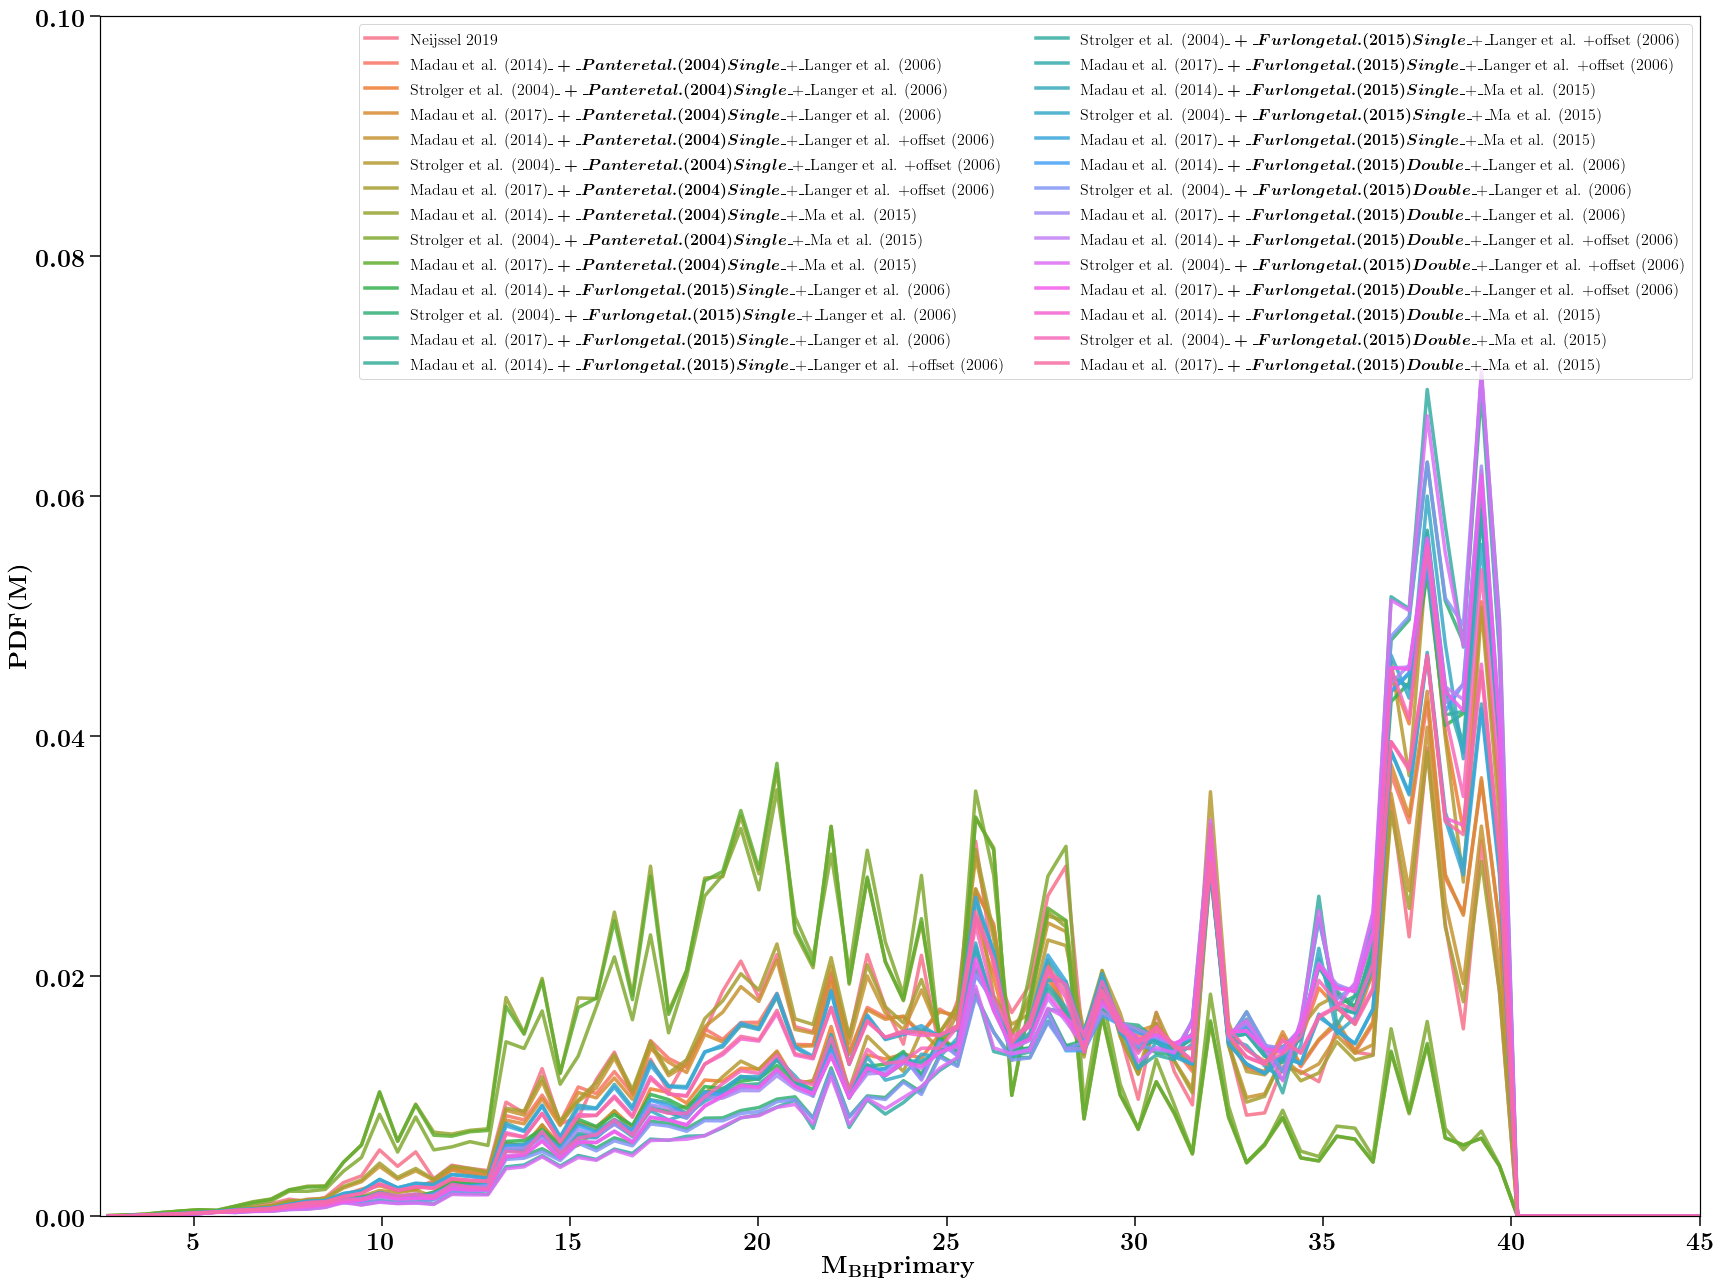

In [25]:


def plot_mbh_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(24,18))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]


        M1         = Data.COMPAS.mass1
        M2         = Data.COMPAS.mass2
        MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
        var_x = MBH
        weights = Data.COMPAS.weight

        print MNS

        bins       = np.linspace(2.5,50,100)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)
        print(labelslist)
        for nrL, L in enumerate(labelslist):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = L
            else:
                label =L
            ax0.plot(center, rate, lw=3.5, c=modelcolors[nrL], label=label, linestyle=linestyles[0], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm  M_{BH} primary $'
    nameY = r'$\rm PDF(M)   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16}, ncol=2)
    topp = 0.1
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=2.5, right=45)

#     ## FILL PLOT WHERE BH-NS produces EM counterpart
#     xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
#     yy_disrupt_0spin = [0, topp]   
#     xx_BHspin_0_5 = [0,7.1] 
#     labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
#     labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'


    plt.tight_layout()
#     plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./MbhDistributionAtRedshiftObs'+ '_varMSSFR'  + '_BBH_.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", len(labelslist)) 

Datalist = [Data_model1] #, Data_model2, Data_model3]
modelnameslist = [r'Fiducial'] #, r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1] #, rates_model2, rates_model3]
totalslist = [totals_model1]#, totals_model2, totals_model3]

plot_mbh_distributions(modelnameslist, rateslist, totalslist, Datalist)

[21.2069  19.5982   4.00741 ...  2.68578  2.72037  2.98001]
['Neijssel 2019', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Madau et al. (2014)$\\_+\\_Furlong et al. (2015) Single$\\_+\\_Langer et al. (2006)', 'Strolger et al. (2004)$\\_+\\_Furlong e

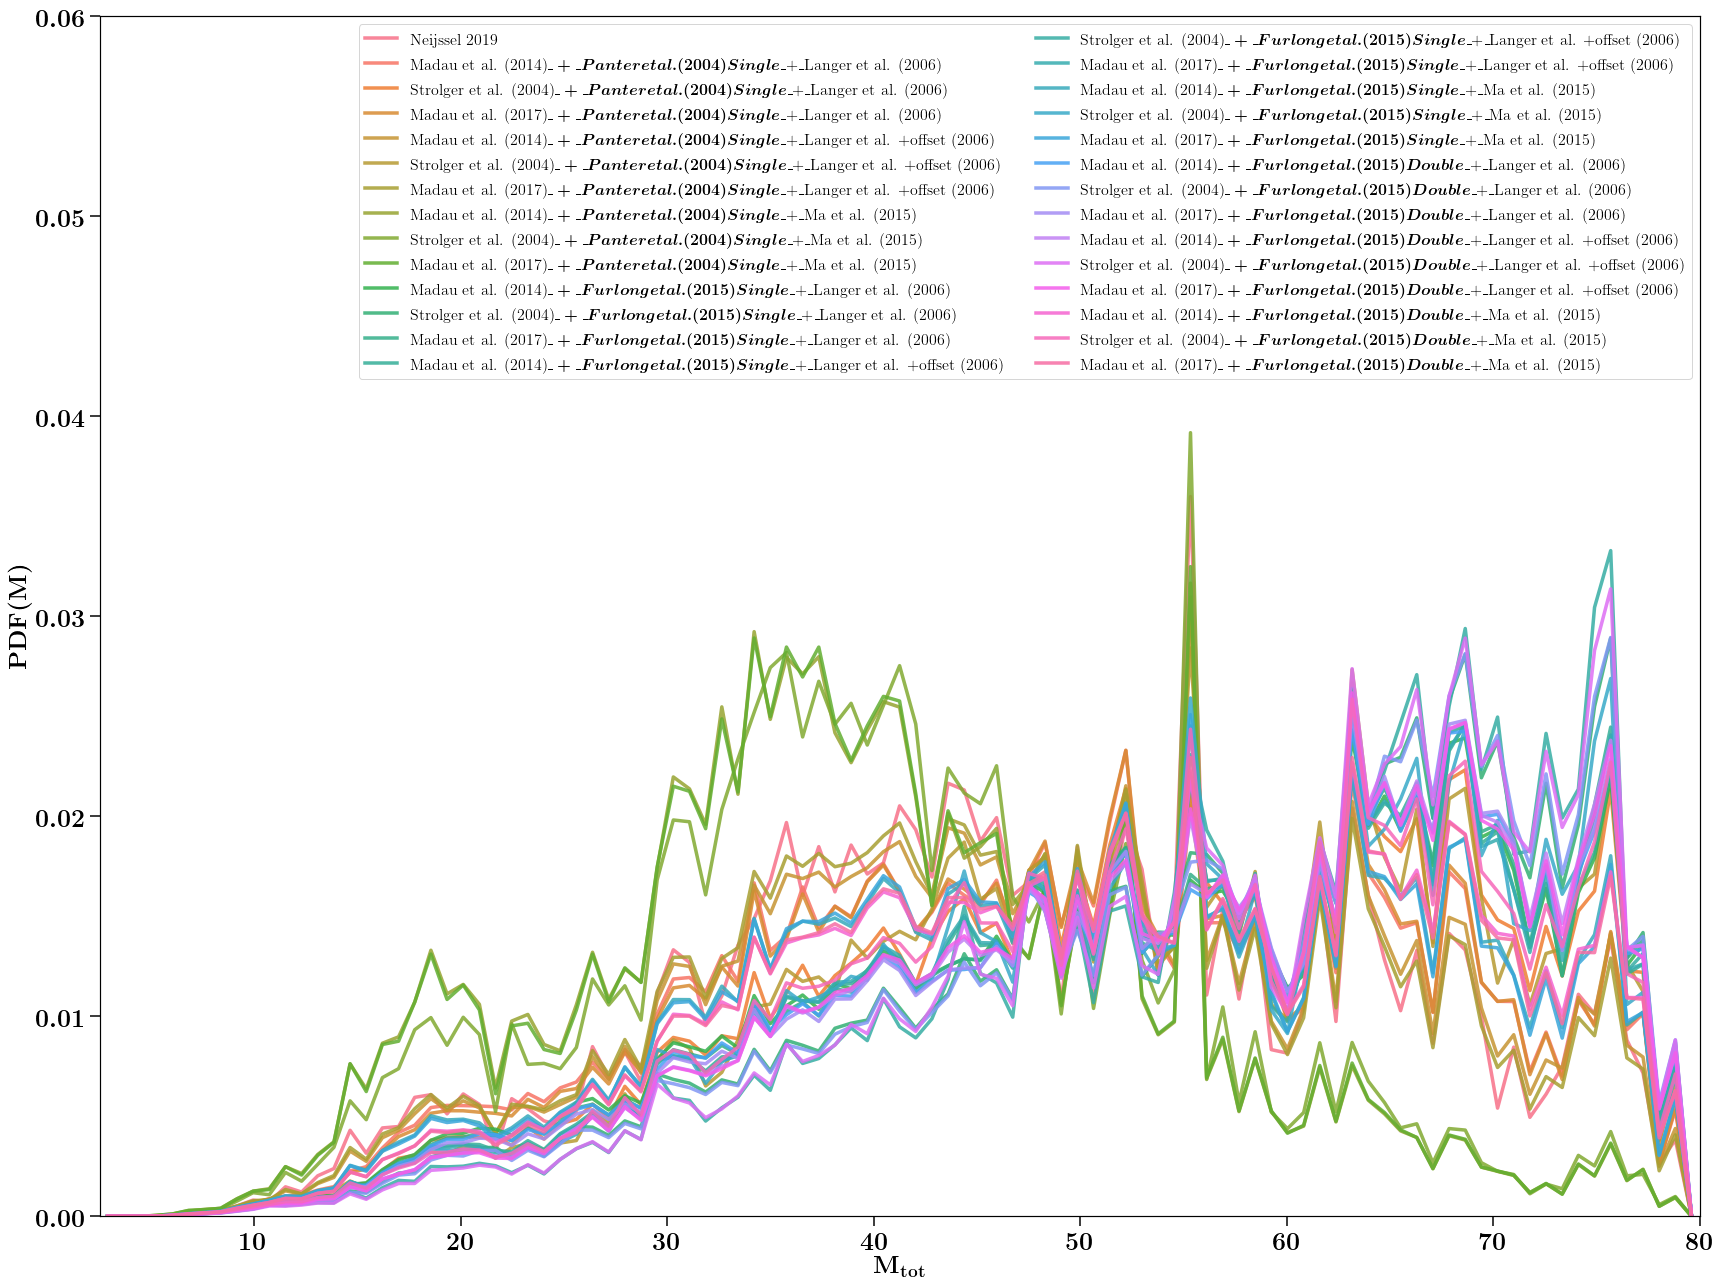

In [23]:


def plot_mtot_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(24,18))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]


        M1         = Data.COMPAS.mass1
        M2         = Data.COMPAS.mass2
        MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
        var_x = MBH+MNS
        weights = Data.COMPAS.weight

        print MNS

        bins       = np.linspace(2.5,80,100)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)
        print(labelslist)
        for nrL, L in enumerate(labelslist):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = L
            else:
                label =L
            ax0.plot(center, rate, lw=3.5, c=modelcolors[nrL], label=label, linestyle=linestyles[0], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm  M_{tot} $'
    nameY = r'$\rm PDF(M)   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16}, ncol=2)
    topp = 0.06
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=2.5, right=80)

#     ## FILL PLOT WHERE BH-NS produces EM counterpart
#     xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
#     yy_disrupt_0spin = [0, topp]   
#     xx_BHspin_0_5 = [0,7.1] 
#     labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
#     labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'


    plt.tight_layout()
#     plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./MtotDistributionAtRedshiftObs'+ '_varMSSFR'  + '_BBH_.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", len(labelslist)) 

Datalist = [Data_model1] #, Data_model2, Data_model3]
modelnameslist = [r'Fiducial'] #, r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1] #, rates_model2, rates_model3]
totalslist = [totals_model1]#, totals_model2, totals_model3]

plot_mtot_distributions(modelnameslist, rateslist, totalslist, Datalist)

[21.2069  19.5982   4.00741 ...  2.68578  2.72037  2.98001]
['Neijssel 2019', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Madau et al. (2014)$\\_+\\_Furlong et al. (2015) Single$\\_+\\_Langer et al. (2006)', 'Strolger et al. (2004)$\\_+\\_Furlong e

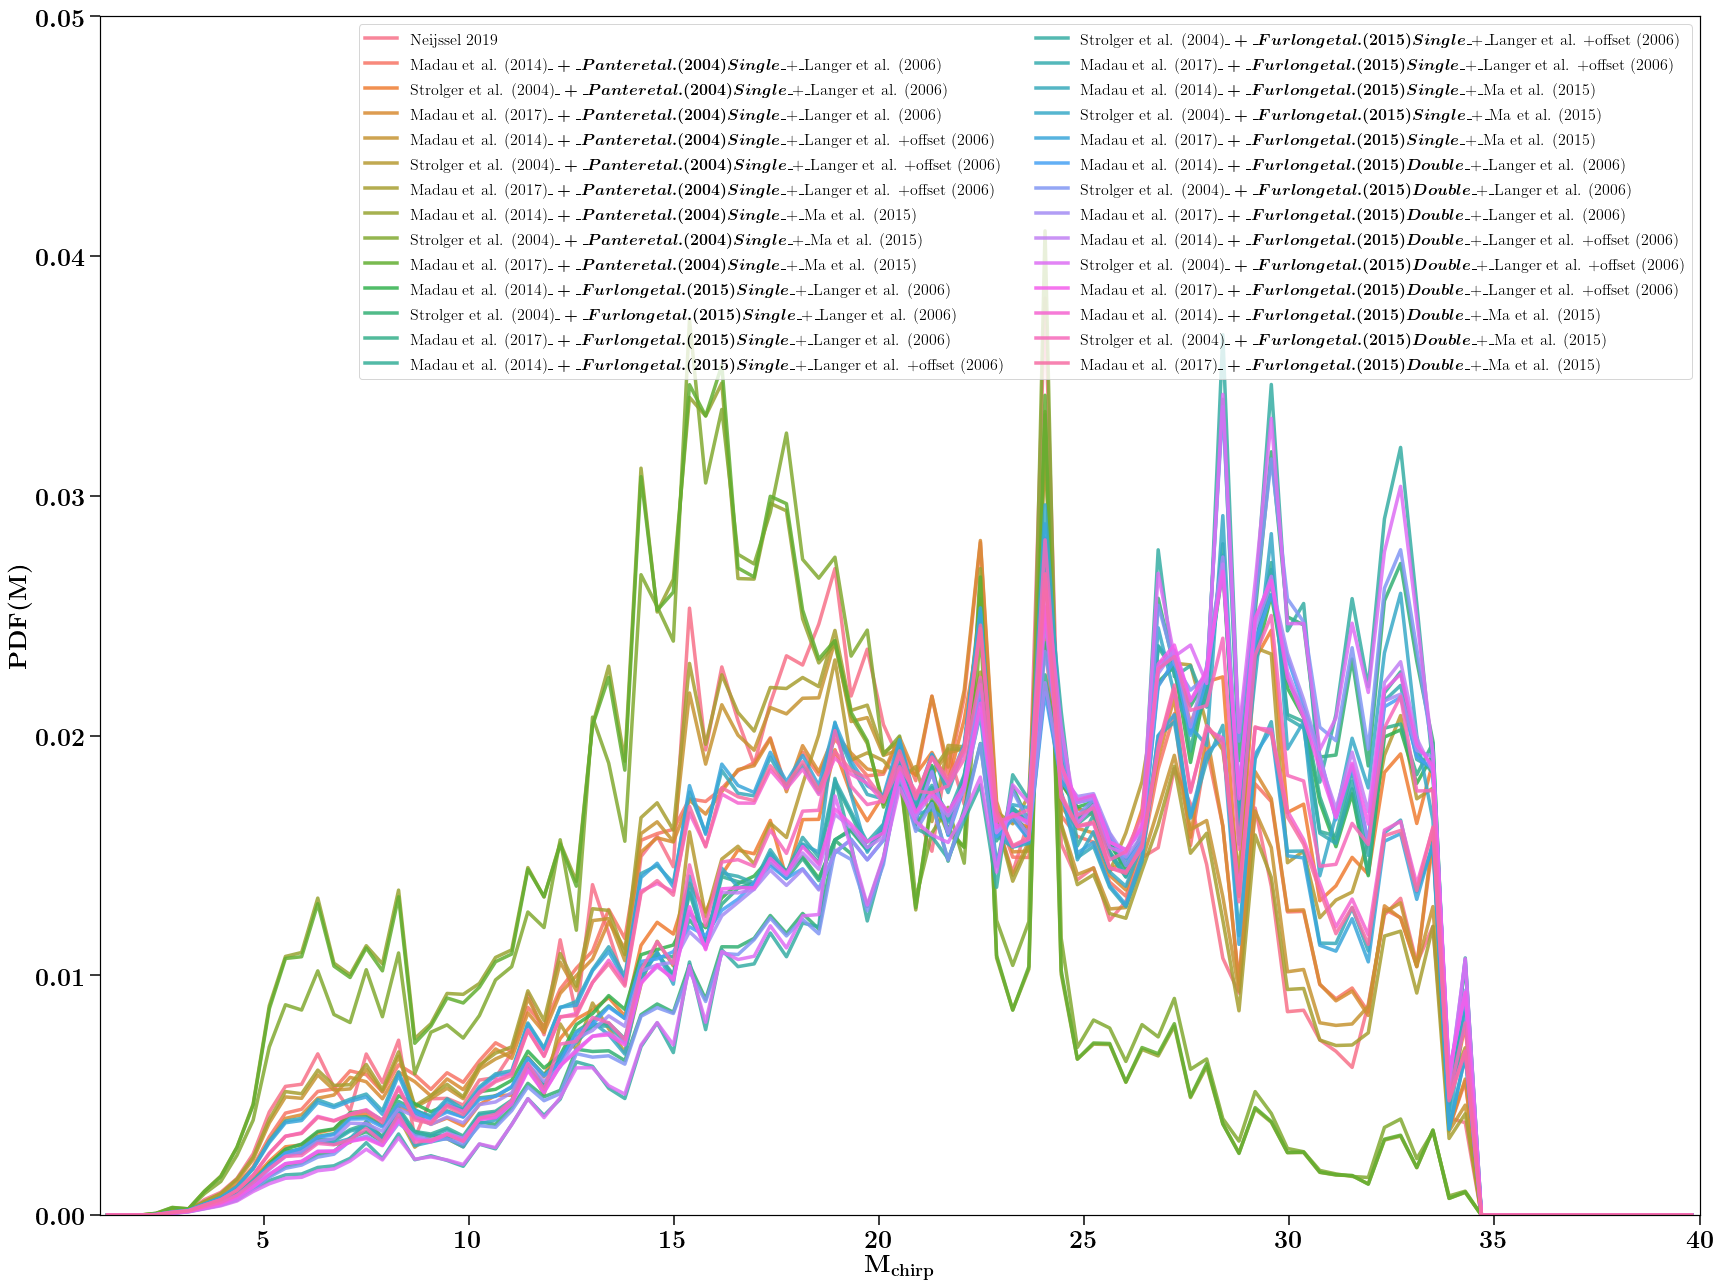

In [24]:


def plot_mchirp_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(24,18))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]


        M1         = Data.COMPAS.mass1
        M2         = Data.COMPAS.mass2
        MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
        var_x = MBH+MNS
        
        var_x = chirpmass(MBH,MNS)
        
        weights = Data.COMPAS.weight

        print MNS

        bins       = np.linspace(1,40,100)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)
        print(labelslist)
        for nrL, L in enumerate(labelslist):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = L
            else:
                label =L
            ax0.plot(center, rate, lw=3.5, c=modelcolors[nrL], label=label, linestyle=linestyles[0], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm  M_{chirp} $'
    nameY = r'$\rm PDF(M)   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16}, ncol=2)
    topp = 0.05
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=1, right=40)

#     ## FILL PLOT WHERE BH-NS produces EM counterpart
#     xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
#     yy_disrupt_0spin = [0, topp]   
#     xx_BHspin_0_5 = [0,7.1] 
#     labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
#     labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'


    plt.tight_layout()
#     plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./MchirpDistributionAtRedshiftObs'+ '_varMSSFR'  + '_BBH_.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", len(labelslist)) 

Datalist = [Data_model1] #, Data_model2, Data_model3]
modelnameslist = [r'Fiducial'] #, r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1] #, rates_model2, rates_model3]
totalslist = [totals_model1]#, totals_model2, totals_model3]

plot_mchirp_distributions(modelnameslist, rateslist, totalslist, Datalist)

[21.2069  19.5982  14.5595  ...  6.97008  7.22899  7.43115]
['Neijssel 2019', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. (2006)', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Langer et al. +offset (2006)', 'Madau et al. (2014)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Strolger et al. (2004)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Madau et al. (2017)$\\_+\\_Panter et al. (2004) Single$\\_+\\_Ma et al. (2015)', 'Madau et al. (2014)$\\_+\\_Furlong et al. (2015) Single$\\_+\\_Langer et al. (2006)', 'Strolger et al. (2004)$\\_+\\_Furlong e

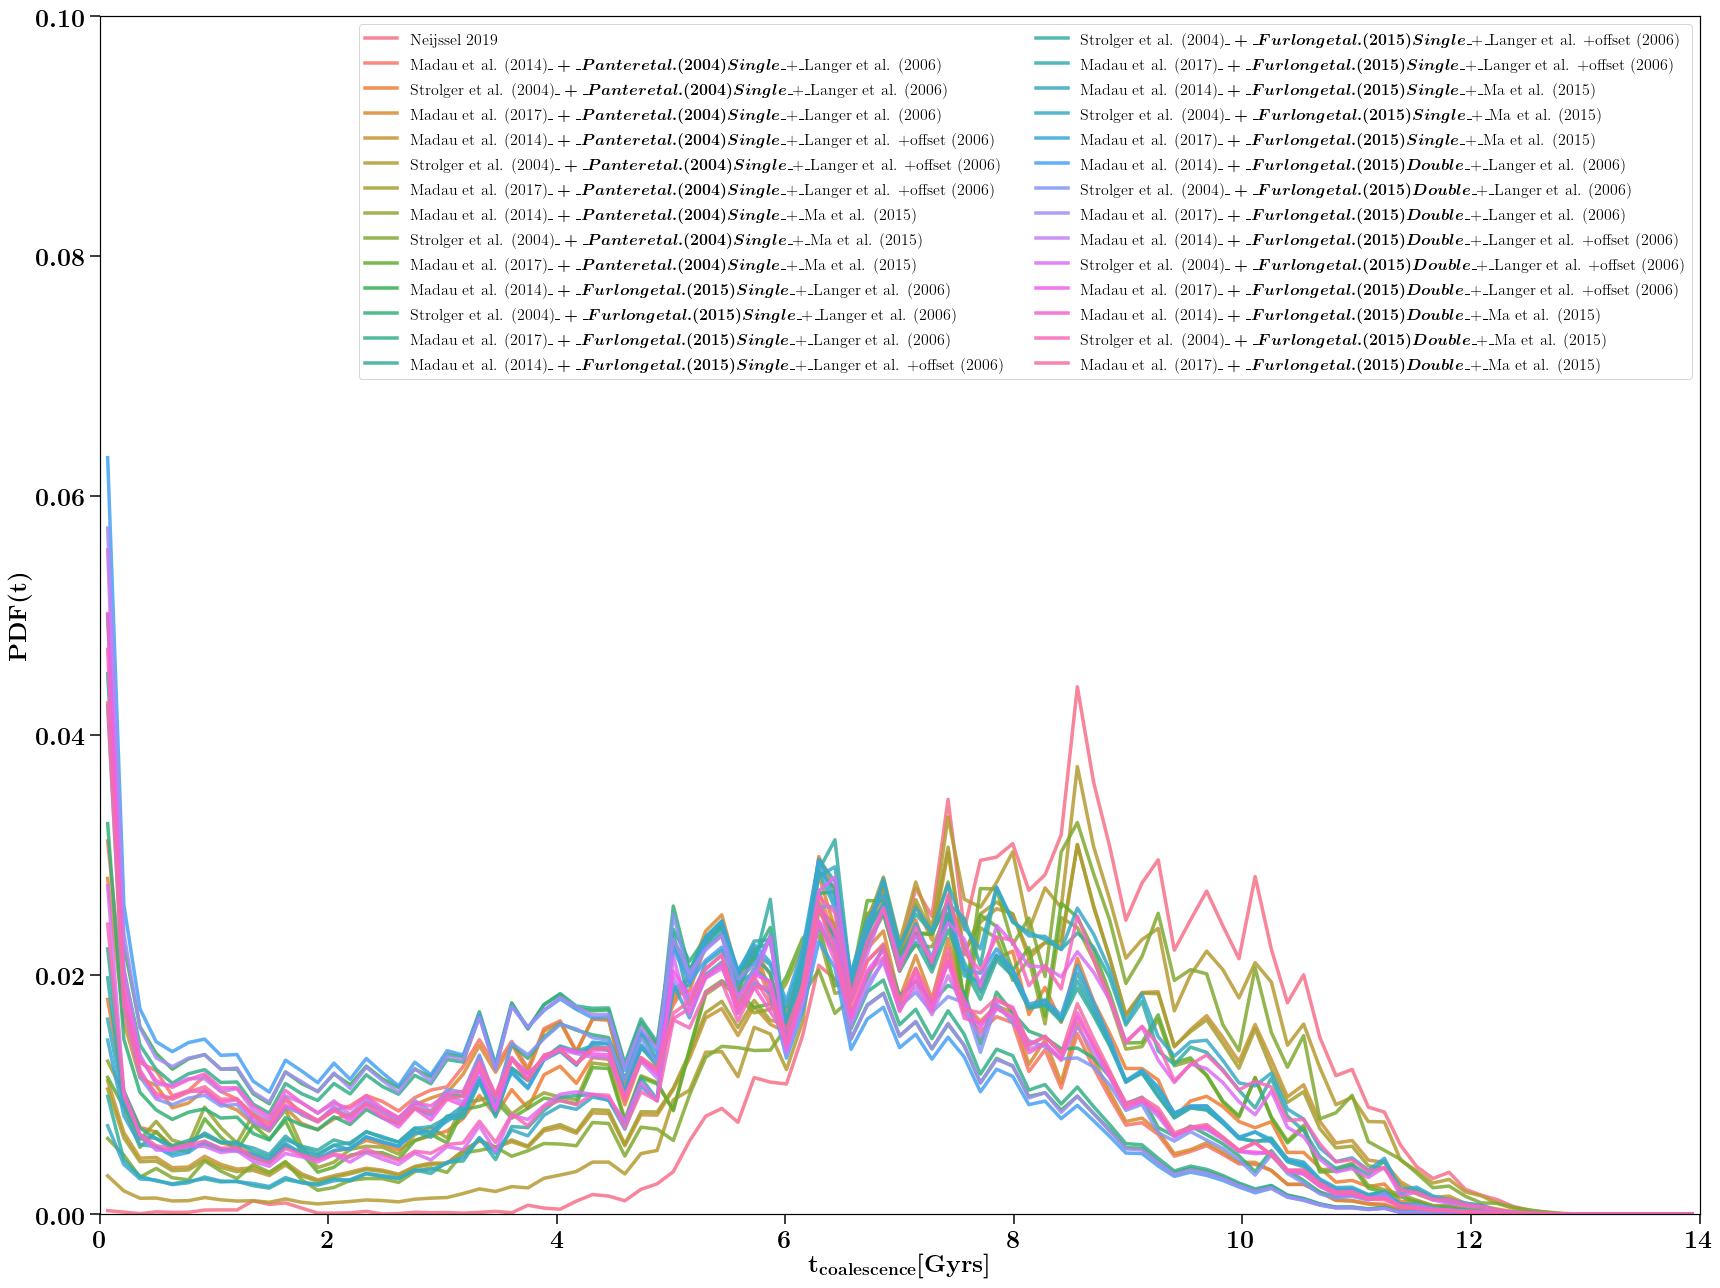

In [26]:


def plot_tc_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(24,18))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]


        M1         = Data.COMPAS.mass1
        M2         = Data.COMPAS.tc
        MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
        var_x = M2/1000
        weights = Data.COMPAS.weight

        print MNS

        bins       = np.linspace(0,14,100)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)
        print(labelslist)
        for nrL, L in enumerate(labelslist):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = L
            else:
                label =L
            ax0.plot(center, rate, lw=3.5, c=modelcolors[nrL], label=label, linestyle=linestyles[0], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm   t_{coalescence} [Gyrs] $'
    nameY = r'$\rm PDF(t)   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16}, ncol=2)
    topp = 0.1
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=0, right=14)

#     ## FILL PLOT WHERE BH-NS produces EM counterpart
#     xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
#     yy_disrupt_0spin = [0, topp]   
#     xx_BHspin_0_5 = [0,7.1] 
#     labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
#     labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'


    plt.tight_layout()
#     plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./tcDistributionAtRedshiftObs'+ '_varMSSFR'  + '_BBH_.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

# cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", len(labelslist)) 

Datalist = [Data_model1] #, Data_model2, Data_model3]
modelnameslist = [r'Fiducial'] #, r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1] #, rates_model2, rates_model3]
totalslist = [totals_model1]#, totals_model2, totals_model3]

plot_tc_distributions(modelnameslist, rateslist, totalslist, Datalist)

NameError: name 'Data' is not defined

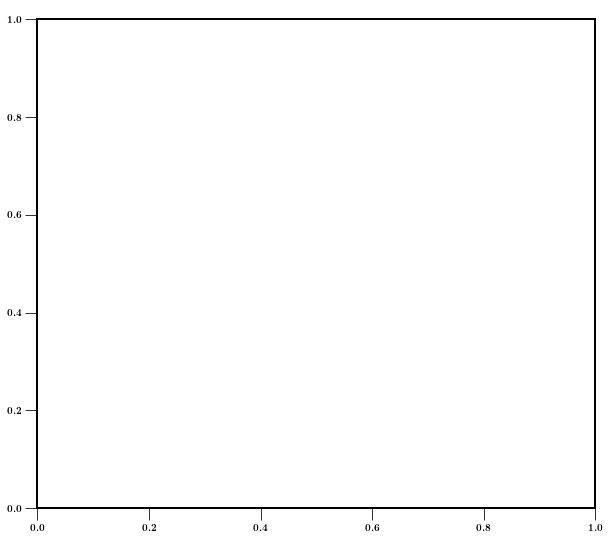

In [12]:
fig , ax0       = plt.subplots(1,1,figsize=(10,9))

############
#  Top panel with MSSFR
############

M1         = Data.COMPAS.mass1
M2         = Data.COMPAS.mass2
MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
var_x = MBH / MNS

print MNS

bins       = np.linspace(1,13.5,100)
center     = (bins[1:]+bins[:-1])/2.
dvar_x      = np.diff(bins)

for nrL, L in enumerate(labels):
    rate       = rates[nrL]
    rate, _    = np.histogram(var_x, bins=bins, weights = rate)
    rate       = np.divide(rate, dvar_x)
    rate       = rate / np.sum(rate)
    label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
    ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
# ax0.get_xaxis().set_visible(True)
nameX = r'$\rm q = M_{BH} / M_{NS} $'
nameY = r'$\rm p(q)   $'
ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
ax0.legend(loc=1, prop={'size':16})
topp = 0.06
ax0.set_ylim(bottom=0, top=topp)
ax0.set_xlim(left=0)

## FILL PLOT WHERE BH-NS produces EM counterpart
xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
yy_disrupt_0spin = [0, topp]   
xx_BHspin_0_5 = [0,7.1] 
labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'

Mejected = ax0.fill_between(x=xx,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
                       y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
                        color='gray', label=labelqlegend, alpha =0.6,hatch='/')
ax0.plot([3.5,3.5], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )



Mejected2 = ax0.fill_between(x=xx_BHspin_0_5,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
                       y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
                        color='gray', label=labelqlegend, alpha =0.3,hatch='.')
ax0.plot([7.1,7.1], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )


leg2 = Legend(ax0, [Mejected, Mejected2], [labelqlegend, labelqlegend2], fontsize=fs-8, loc="center right")
ax0.add_artist(leg2)

plt.tight_layout()
plt.grid()



# plt.subplots_adjust(wspace=0., hspace=0.0)
plt.savefig('./qDistributionAtRedshiftObs_weighted.png', dpi=300, transparent=False)
plt.show()
# plt.close()

In [ ]:
print var_x

In [11]:
from matplotlib.legend import Legend

modelname = 'alpha0_1'

# Different model

In [13]:
#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/alpha0_1/'
modelname = 'alpha0_1'
#Will only look at BBHs so might as well set everything
minz = 0.
maxz = 1.
resz = 50
Data_model2 = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BBH',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=False, Cosmology='Custom Flat')

#I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
#Doesnt matter to much (between WMAP and 
#this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

print(Data_model2.COMPAS.mass1)
print(len(Data_model2.COMPAS.mass1))

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[2.04871 1.35708 1.31002 ... 6.16676 4.9449  6.16654]
50208


In [14]:
rates_model2    = []
totals_model2   = []
for nrL, L in enumerate(labels):
    Data_model2.MSSFR.Zprescription         = method[nrL]
    Data_model2.MSSFR.SFRprescription       = SFRs[nrL]
    Data_model2.MSSFR.logNormalPrescription = logNormal[nrL]
    Data_model2.MSSFR.GSMFprescription      = GSMFs[nrL]
    Data_model2.MSSFR.ZMprescription        = MZs[nrL]
    Data_model2.cosmologicalIntegration()
        
    weightSTROOPWAFEL = Data_model2.COMPAS.weight # //floor weight
    Row        =  np.sum(Data_model2.PerSystemPerRedshift_ratesObserved*weightSTROOPWAFEL, axis=0) # //floor weight

    
#     Row        =np.sum(Data_model2.PerSystemPerRedshift_ratesObserved, axis=0)
    rates_model2.append(Row)
    totals_model2.extend([np.sum(Row)])
    print(L, np.sum(Row))

('Preferred model', 0.05899119823273778)
('Barrett et al. (2018) MSSFR', 0.28010391578239163)
('Furlong et al. (2015) Single', 0.25083697054398735)
('Ma et al. (2015)', 0.10142733520243355)


In [ ]:
fig , ax0       = plt.subplots(1,1,figsize=(10,9))

############
#  Top panel with MSSFR
############

M1         = Data_model2.COMPAS.mass1
M2         = Data_model2.COMPAS.mass2
MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
var_x = MBH / MNS

print MNS

bins       = np.linspace(1,13.5,100)
center     = (bins[1:]+bins[:-1])/2.
dvar_x      = np.diff(bins)

for nrL, L in enumerate(labels):
    rate       = rates_model2[nrL]
    rate, _    = np.histogram(var_x, bins=bins, weights = rate)
    rate       = np.divide(rate, dvar_x)
    rate       = rate / np.sum(rate)
    label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals_model2[nrL]))
    ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
# ax0.get_xaxis().set_visible(True)
nameX = r'$\rm q = M_{BH} / M_{NS} $'
nameY = r'$\rm p(q)   $'
ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
ax0.legend(loc=1, prop={'size':16})
topp = 0.06
ax0.set_ylim(bottom=0, top=topp)
ax0.set_xlim(left=0)

## FILL PLOT WHERE BH-NS produces EM counterpart
xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
yy_disrupt_0spin = [0, topp]   
xx_BHspin_0_5 = [0,7.1] 
labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'

Mejected = ax0.fill_between(x=xx,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
                       y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
                        color='gray', label=labelqlegend, alpha =0.6,hatch='/')
ax0.plot([3.5,3.5], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )



Mejected2 = ax0.fill_between(x=xx_BHspin_0_5,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
                       y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
                        color='gray', label=labelqlegend, alpha =0.3,hatch='.')
ax0.plot([7.1,7.1], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )


leg2 = Legend(ax0, [Mejected, Mejected2], [labelqlegend, labelqlegend2], fontsize=fs-8, loc="center right")
ax0.add_artist(leg2)

plt.tight_layout()
plt.grid()



# plt.subplots_adjust(wspace=0., hspace=0.0)
plt.savefig('./qDistributionAtRedshiftObs'+'_model_'+ modelname + '_BBH_.png', dpi=300, transparent=False)
plt.show()
# plt.close()




# MODEL 2: ALPHA = 10 

In [15]:
#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/alpha_10/'
modelname = 'alpha_10'
#Will only look at BBHs so might as well set everything
minz = 0.
maxz = 1.
resz = 50
Data_model3 = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BBH',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=False, Cosmology='Custom Flat')

#I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
#Doesnt matter to much (between WMAP and 
#this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

print(Data_model3.COMPAS.mass1)
print(len(Data_model3.COMPAS.mass1))

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[3.40435 4.77606 1.27758 ... 6.16676 4.9449  6.16654]
275375


In [16]:
rates_model3    = []
totals_model3   = []
for nrL, L in enumerate(labels):
    Data_model3.MSSFR.Zprescription         = method[nrL]
    Data_model3.MSSFR.SFRprescription       = SFRs[nrL]
    Data_model3.MSSFR.logNormalPrescription = logNormal[nrL]
    Data_model3.MSSFR.GSMFprescription      = GSMFs[nrL]
    Data_model3.MSSFR.ZMprescription        = MZs[nrL]
    Data_model3.cosmologicalIntegration()
        
    weightSTROOPWAFEL = Data_model3.COMPAS.weight # //floor weight
    Row        =  np.sum(Data_model3.PerSystemPerRedshift_ratesObserved*weightSTROOPWAFEL, axis=0) # //floor weight

    
#     Row        =np.sum(Data_model3.PerSystemPerRedshift_ratesObserved, axis=0)
    rates_model3.append(Row)
    totals_model3.extend([np.sum(Row)])
    print(L, np.sum(Row))

('Preferred model', 0.10199714353828129)
('Barrett et al. (2018) MSSFR', 0.772984147608102)
('Furlong et al. (2015) Single', 1.0179612776306053)
('Ma et al. (2015)', 0.1278321974599789)


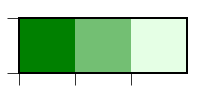

In [99]:
snscolor = sns.palplot(sns.light_palette("green",3, reverse=True))
snscolor = sns.color_palette(sns.light_palette("green",3 , reverse=True))

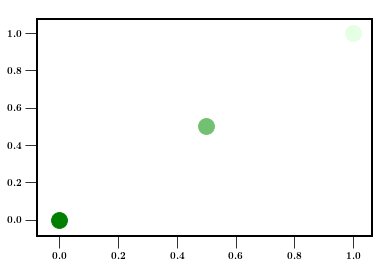

In [100]:
for xx_ind, xx in enumerate(np.linspace(0,1,3)):
    plt.scatter(xx,xx, c=snscolor[xx_ind], s=250)
    
    
    

In [103]:
xx = np.linspace(0,1,8)
print(xx[4:7])
print(xx[2])

[0.57142857 0.71428571 0.85714286]
0.2857142857142857


# PLOT COMBINED 

In [10]:
from matplotlib.legend import Legend

modelname = 'alpha0_1'

import seaborn as sns;

sns.color_palette("husl", 8)
# ...    _ = plt.plot(np.c_[np.zeros(8), np.arange(8)].T)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

In [8]:


def plot_q_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(12,9))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]


        M1         = Data.COMPAS.mass1
        M2         = Data.COMPAS.mass2
        MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
        var_x = MBH / MNS
        weights = Data.COMPAS.weight

        print MNS

        bins       = np.linspace(1,13.5,100)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)

        for nrL, L in enumerate(labels):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = modelnameslist[ind_m]
            else:
                label = None
            ax0.plot(center, rate, lw=3.5, c=modelcolors[ind_m], label=label, linestyle=linestyles[nrL], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm q = M_{BH} / M_{NS} $'
    nameY = r'$\rm PDF(q)   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16})
    topp = 0.1
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=1, right=10)

    ## FILL PLOT WHERE BH-NS produces EM counterpart
    xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
    yy_disrupt_0spin = [0, topp]   
    xx_BHspin_0_5 = [0,7.1] 
    labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
    labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'

    Mejected = ax0.fill_between(x=xx,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
                           y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
                            color='gray', label=labelqlegend, alpha =0.6)
    ax0.plot([3.5,3.5], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )



    Mejected2 = ax0.fill_between(x=xx_BHspin_0_5,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
                           y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
                            color='gray', label=labelqlegend, alpha =0.3)
    ax0.plot([7.1,7.1], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )


    leg2 = Legend(ax0, [Mejected, Mejected2], [labelqlegend, labelqlegend2], fontsize=fs-8, loc="center right")
    ax0.add_artist(leg2)

    plt.tight_layout()
#     plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./qDistributionAtRedshiftObs'+ '_varMSSFR'  + '_BBH_.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", 5) 

Datalist = [Data_model1] #, Data_model2, Data_model3]
modelnameslist = [r'Fiducial'] #, r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1, rates_model2, rates_model3]
totalslist = [totals_model1, totals_model2, totals_model3]

plot_q_distributions(modelnameslist, rateslist, totalslist, Datalist)

NameError: name 'rates_model1' is not defined

In [50]:
# TOTAL MASS 

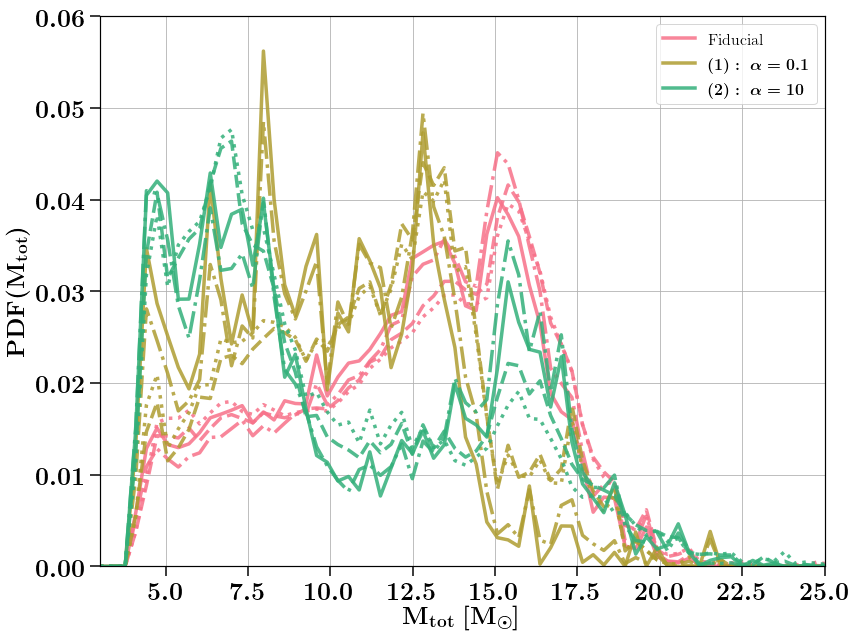

In [25]:


def plot_mtot_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(12,9))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]


        M1         = Data.COMPAS.mass1
        M2         = Data.COMPAS.mass2
#         MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
        var_x = M1 + M2

#         print MNS

        bins       = np.linspace(2,27.5,80)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)

        for nrL, L in enumerate(labels):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = modelnameslist[ind_m]
            else:
                label = None
            ax0.plot(center, rate, lw=3.5, c=modelcolors[ind_m], label=label, linestyle=linestyles[nrL], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm M_{\rm{tot}} \ [{\rm{M}}_{\odot}]$'
    nameY = r'$\rm PDF(M_{\rm{tot}})   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16})
    topp = 0.06
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=3, right=25)

    ## FILL PLOT WHERE BH-NS produces EM counterpart
#     xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
#     yy_disrupt_0spin = [0, topp]   
#     xx_BHspin_0_5 = [0,7.1] 
#     labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
#     labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'

#     Mejected = ax0.fill_between(x=xx,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.6)
#     ax0.plot([3.5,3.5], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )



#     Mejected2 = ax0.fill_between(x=xx_BHspin_0_5,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.3)
#     ax0.plot([7.1,7.1], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )


#     leg2 = Legend(ax0, [Mejected, Mejected2], [labelqlegend, labelqlegend2], fontsize=fs-8, loc="center right")
#     ax0.add_artist(leg2)

    plt.tight_layout()
    plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./mtotDistributionAtRedshiftObs'+ 'combinedmodels' + '_BBH_.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", 5) 

Datalist = [Data_model1, Data_model2, Data_model3]
modelnameslist = [r'Fiducial', r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1, rates_model2, rates_model3]
totalslist = [totals_model1, totals_model2, totals_model3]

plot_mtot_distributions(modelnameslist, rateslist, totalslist, Datalist)

In [ ]:
# Plot individual masses

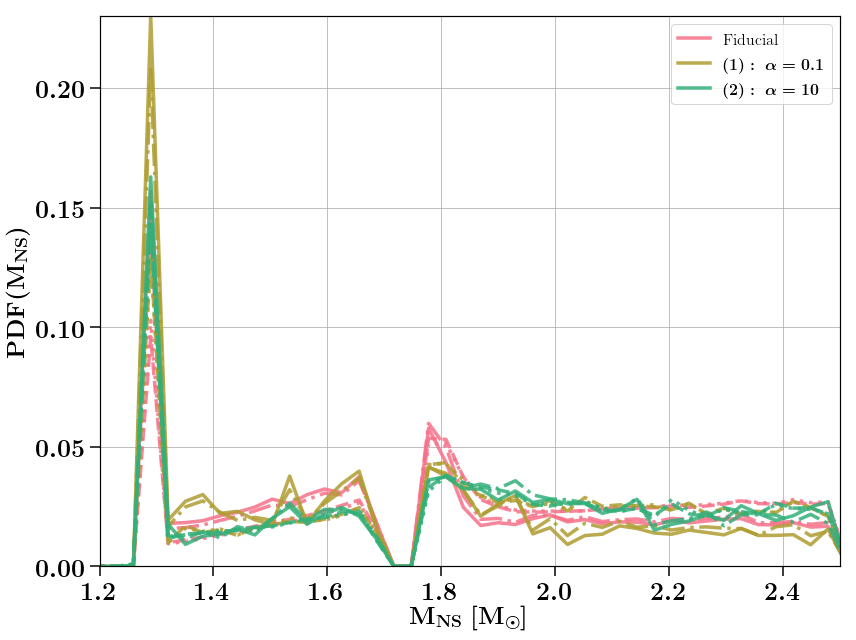

In [30]:


def plot_mns_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(12,9))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]


        M1         = Data.COMPAS.mass1
        M2         = Data.COMPAS.mass2
        MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
        var_x = MNS

#         print MNS

        bins       = np.linspace(1,2.8,60)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)

        for nrL, L in enumerate(labels):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = modelnameslist[ind_m]
            else:
                label = None
            ax0.plot(center, rate, lw=3.5, c=modelcolors[ind_m], label=label, linestyle=linestyles[nrL], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm M_{\rm{NS}} \ [{\rm{M}}_{\odot}]$'
    nameY = r'$\rm PDF(M_{\rm{NS}})   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16})
    topp = 0.23
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=1.2, right=2.5)

    ## FILL PLOT WHERE BH-NS produces EM counterpart
#     xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
#     yy_disrupt_0spin = [0, topp]   
#     xx_BHspin_0_5 = [0,7.1] 
#     labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
#     labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'

#     Mejected = ax0.fill_between(x=xx,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.6)
#     ax0.plot([3.5,3.5], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )



#     Mejected2 = ax0.fill_between(x=xx_BHspin_0_5,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.3)
#     ax0.plot([7.1,7.1], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )


#     leg2 = Legend(ax0, [Mejected, Mejected2], [labelqlegend, labelqlegend2], fontsize=fs-8, loc="center right")
#     ax0.add_artist(leg2)

    plt.tight_layout()
    plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./mnsDistributionAtRedshiftObs'+ 'combinedmodels' + '_BBH_.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", 5) 

Datalist = [Data_model1, Data_model2, Data_model3]
modelnameslist = [r'Fiducial', r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1, rates_model2, rates_model3]
totalslist = [totals_model1, totals_model2, totals_model3]

plot_mns_distributions(modelnameslist, rateslist, totalslist, Datalist)

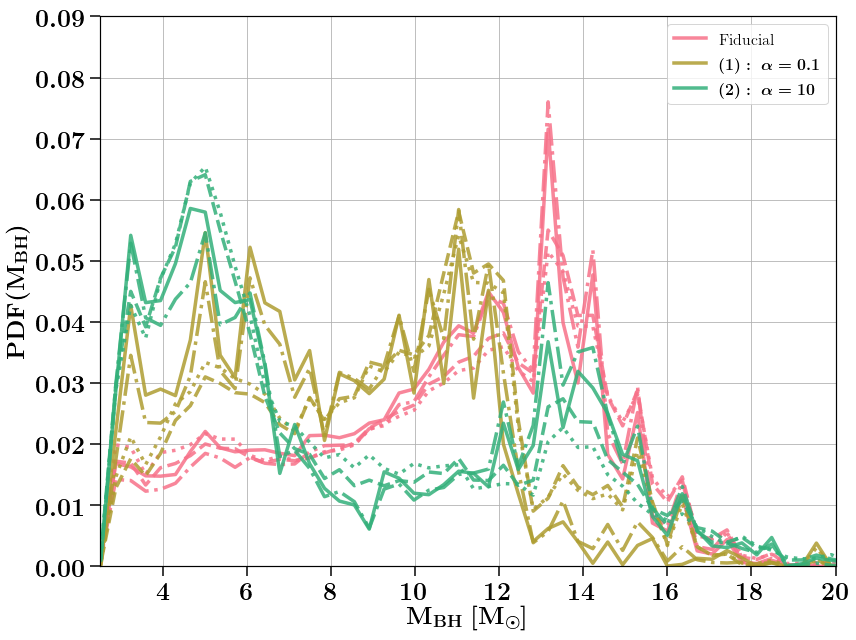

In [32]:


def plot_mbh_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(12,9))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]


        M1         = Data.COMPAS.mass1
        M2         = Data.COMPAS.mass2
        MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
        var_x = MBH

#         print MNS

        bins       = np.linspace(2,30,80)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)

        for nrL, L in enumerate(labels):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = modelnameslist[ind_m]
            else:
                label = None
            ax0.plot(center, rate, lw=3.5, c=modelcolors[ind_m], label=label, linestyle=linestyles[nrL], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm M_{\rm{BH}} \ [{\rm{M}}_{\odot}]$'
    nameY = r'$\rm PDF(M_{\rm{BH}})   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16})
    topp = 0.09
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=2.5, right=20.0)

    ## FILL PLOT WHERE BH-NS produces EM counterpart
#     xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
#     yy_disrupt_0spin = [0, topp]   
#     xx_BHspin_0_5 = [0,7.1] 
#     labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
#     labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'

#     Mejected = ax0.fill_between(x=xx,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.6)
#     ax0.plot([3.5,3.5], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )



#     Mejected2 = ax0.fill_between(x=xx_BHspin_0_5,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.3)
#     ax0.plot([7.1,7.1], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )


#     leg2 = Legend(ax0, [Mejected, Mejected2], [labelqlegend, labelqlegend2], fontsize=fs-8, loc="center right")
#     ax0.add_artist(leg2)

    plt.tight_layout()
    plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./mbhDistributionAtRedshiftObs'+ 'combinedmodels' + '_BBH_.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", 5) 

Datalist = [Data_model1, Data_model2, Data_model3]
modelnameslist = [r'Fiducial', r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1, rates_model2, rates_model3]
totalslist = [totals_model1, totals_model2, totals_model3]

plot_mbh_distributions(modelnameslist, rateslist, totalslist, Datalist)

# CHIRP MASS

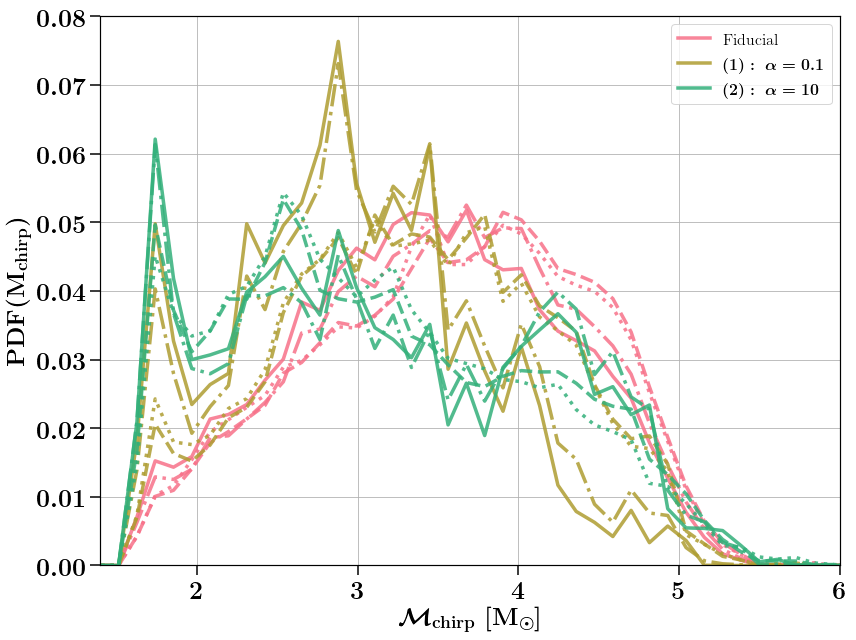

In [34]:


def plot_mchirp_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(12,9))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]


        M1         = Data.COMPAS.mass1
        M2         = Data.COMPAS.mass2
        MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
        var_x = Data.COMPAS.mChirp

#         print MNS

        bins       = np.linspace(1,10,80)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)

        for nrL, L in enumerate(labels):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = modelnameslist[ind_m]
            else:
                label = None
            ax0.plot(center, rate, lw=3.5, c=modelcolors[ind_m], label=label, linestyle=linestyles[nrL], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm \mathcal{M}_{\rm{chirp}} \ [{\rm{M}}_{\odot}]$'
    nameY = r'$\rm PDF(M_{\rm{chirp}})   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16})
    topp = 0.08
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=1.4, right=6)

    ## FILL PLOT WHERE BH-NS produces EM counterpart
#     xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
#     yy_disrupt_0spin = [0, topp]   
#     xx_BHspin_0_5 = [0,7.1] 
#     labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
#     labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'

#     Mejected = ax0.fill_between(x=xx,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.6)
#     ax0.plot([3.5,3.5], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )



#     Mejected2 = ax0.fill_between(x=xx_BHspin_0_5,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.3)
#     ax0.plot([7.1,7.1], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )


#     leg2 = Legend(ax0, [Mejected, Mejected2], [labelqlegend, labelqlegend2], fontsize=fs-8, loc="center right")
#     ax0.add_artist(leg2)

    plt.tight_layout()
    plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./mchirpDistributionAtRedshiftObs'+ 'combinedmodels' + '_BBH_.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", 5) 

Datalist = [Data_model1, Data_model2, Data_model3]
modelnameslist = [r'Fiducial', r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1, rates_model2, rates_model3]
totalslist = [totals_model1, totals_model2, totals_model3]

plot_mchirp_distributions(modelnameslist, rateslist, totalslist, Datalist)

In [ ]:
.tc

-13.961431495543849
-10.142275609031692
-12.651498483084568


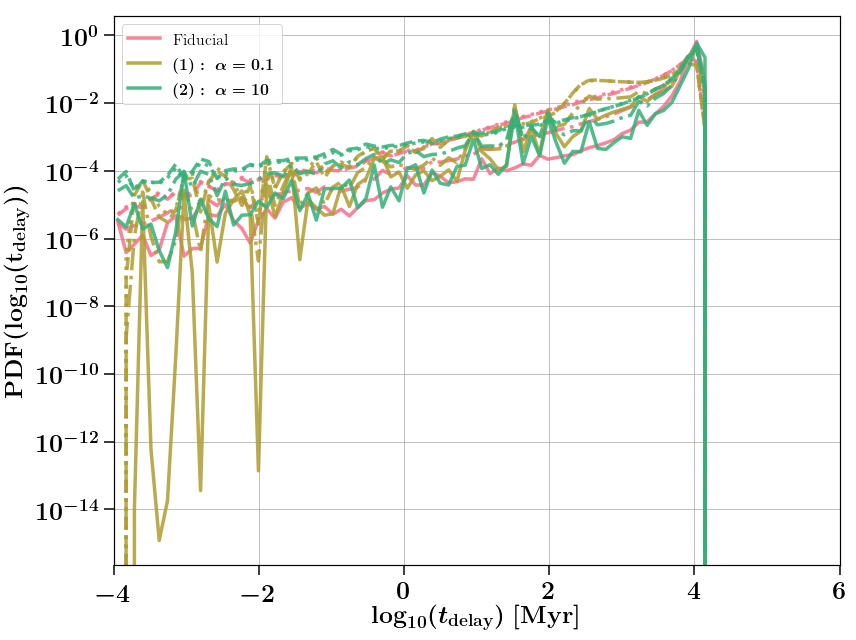

In [36]:


def plot_tdelay_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(12,9))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]



        var_x = Data.COMPAS.tc
        var_x = np.log10(var_x)
        
        print(min(var_x))
#         print MNS

        bins       = np.linspace(-4,5,80)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)

        for nrL, L in enumerate(labels):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = modelnameslist[ind_m]
            else:
                label = None
            ax0.plot(center, rate, lw=3.5, c=modelcolors[ind_m], label=label, linestyle=linestyles[nrL], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\log_{10}(t_{\rm{delay}}) \ [{\rm{Myr}}]$'
    nameY = r'$\rm PDF(\log_{10}(t_{\rm{delay}}))   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=2, prop={'size':16})
    topp = 0.085
#     ax0.set_ylim(bottom=10, top=topp)
    ax0.set_xlim(left=-4, right=6)
    ax0.set_yscale('log')

    plt.tight_layout()
    plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./tdelayDistributionAtRedshiftObs'+ 'combinedmodels' + '_BBH_.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", 5) 

Datalist = [Data_model1, Data_model2, Data_model3]
modelnameslist = [r'Fiducial', r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1, rates_model2, rates_model3]
totalslist = [totals_model1, totals_model2, totals_model3]

plot_tdelay_distributions(modelnameslist, rateslist, totalslist, Datalist)

-13.961431495543849
-10.142275609031692
-12.651498483084568


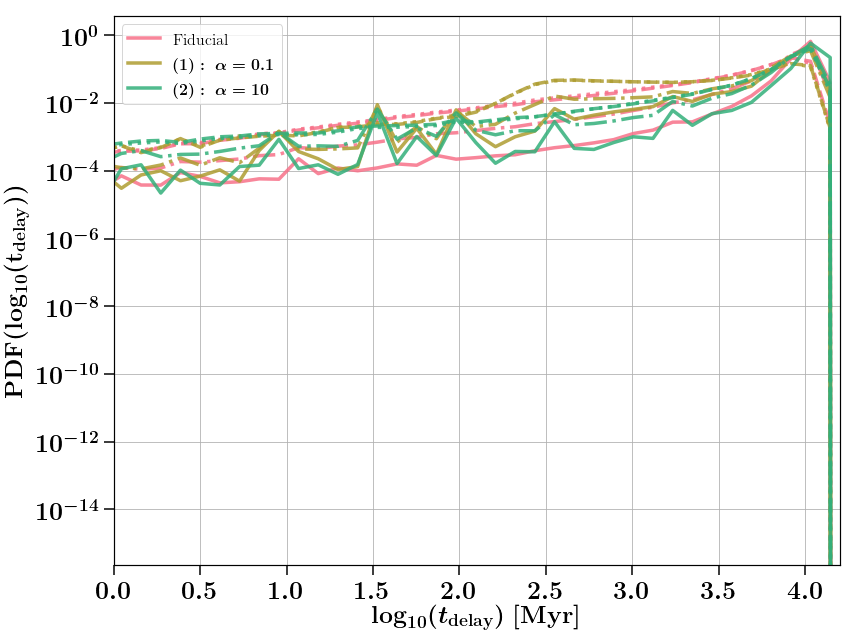

In [44]:


def plot_tdelay_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(12,9))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]



        var_x = Data.COMPAS.tc
        var_x = np.log10(var_x)
        
        print(min(var_x))
#         print MNS

        bins       = np.linspace(-4,5,80)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)

        for nrL, L in enumerate(labels):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = modelnameslist[ind_m]
            else:
                label = None
            ax0.plot(center, rate, lw=3.5, c=modelcolors[ind_m], label=label, linestyle=linestyles[nrL], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\log_{10}(t_{\rm{delay}}) \ [{\rm{Myr}}]$'
    nameY = r'$\rm PDF(\log_{10}(t_{\rm{delay}}))   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=2, prop={'size':16})
    topp = 0.085
#     ax0.set_ylim(bottom=10, top=topp)
    ax0.set_xlim(left=0, right=4.2)
    ax0.set_yscale('log')

    plt.tight_layout()
    plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./tdelayDistributionAtRedshiftObs'+ 'combinedmodels' + 'smallxrange_' '.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", 5) 

Datalist = [Data_model1, Data_model2, Data_model3]
modelnameslist = [r'Fiducial', r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1, rates_model2, rates_model3]
totalslist = [totals_model1, totals_model2, totals_model3]

plot_tdelay_distributions(modelnameslist, rateslist, totalslist, Datalist)

1.09287e-14
7.2065e-11
2.23101e-13


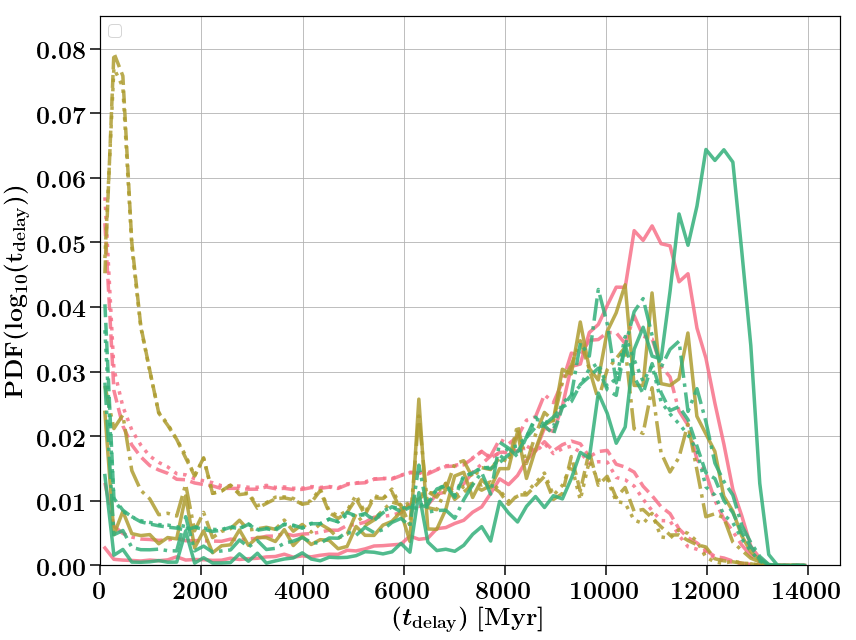

In [42]:


def plot_tdelay_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(12,9))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]



        var_x = Data.COMPAS.tc
        var_x = (var_x)
        
        print(min(var_x))
#         print MNS

        bins       = np.linspace(-1,max(var_x),80)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)

        for nrL, L in enumerate(labels):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = None
            else:
                label = None
            ax0.plot(center, rate, lw=3.5, c=modelcolors[ind_m], label=label, linestyle=linestyles[nrL], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$(t_{\rm{delay}}) \ [{\rm{Myr}}]$'
    nameY = r'$\rm PDF(\log_{10}(t_{\rm{delay}}))   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=2, prop={'size':16})
    topp = 0.085
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=0)
#     ax0.set_yscale('log')

    plt.tight_layout()
    plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./tdelayDistributionAtRedshiftObs'+ 'combinedmodels' + 'LINLIN'+ '_BBH_.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", 5) 

Datalist = [Data_model1, Data_model2, Data_model3]
modelnameslist = [r'Fiducial', r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1, rates_model2, rates_model3]
totalslist = [totals_model1, totals_model2, totals_model3]

plot_tdelay_distributions(modelnameslist, rateslist, totalslist, Datalist)